In [2]:
# Импорт необходимых библиотек
import pandas as pd
from google.colab import files

# Загрузка файла с компьютера
uploaded = files.upload()

# Чтение загруженного файла в DataFrame
df = pd.read_csv(next(iter(uploaded)))

# Вывод первых нескольких строк данных
print("Первые пять строк данных:")
print(df.head())

# Вывод основной информации о датасете
print("\nОбщая информация о данных:")
print(df.info())

# Проверка на наличие пропущенных значений
missing_values = df.isnull().sum()
print("\nКоличество пропущенных значений в каждом столбце:")
print(missing_values)

# Основные статистики по числовым признакам
print("\nОсновные статистики по числовым признакам:")
print(df.describe())


Saving heart.csv to heart.csv
Первые пять строк данных:
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  

Общая информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column       

**В датасете есть пять категориальных признаков с типом данных object. **

Sex: Пол пациента (M или F).

ChestPainType: Тип боли в груди (например, ATA, NAP, ASY).

RestingECG: Результат электрокардиографии (например, Normal, ST).

ExerciseAngina: Наличие стенокардии при физической нагрузке (Y или N).

ST_Slope: Наклон сегмента ST при нагрузке (например, Up, Flat).

Эти признаки закодируем числовые значения

In [3]:
from sklearn.preprocessing import LabelEncoder

# Преобразование категориальных переменных с помощью pd.get_dummies
df_encoded = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], drop_first=True)

# Проверка преобразованных данных
print("Первые пять строк преобразованных данных:")
print(df_encoded.head())

# Проверка типа данных после преобразования
print("\nТипы данных после преобразования:")
print(df_encoded.dtypes)


Первые пять строк преобразованных данных:
   Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0   40        140          289          0    172      0.0             0   
1   49        160          180          0    156      1.0             1   
2   37        130          283          0     98      0.0             0   
3   48        138          214          0    108      1.5             1   
4   54        150          195          0    122      0.0             0   

   Sex_M  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0   True               True              False             False   
1  False              False               True             False   
2   True               True              False             False   
3  False              False              False             False   
4   True              False               True             False   

   RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y  ST_Slope_Flat  \
0               True      

Построим два графика, которые помогут понять особенности датасета:

Распределение возрастов пациентов в зависимости от наличия болезни сердца —
чтобы увидеть, как возраст влияет на вероятность наличия болезни.

Гистограмма уровня холестерина — чтобы определить, есть ли значимые отклонения, которые могут быть связаны с наличием болезни.

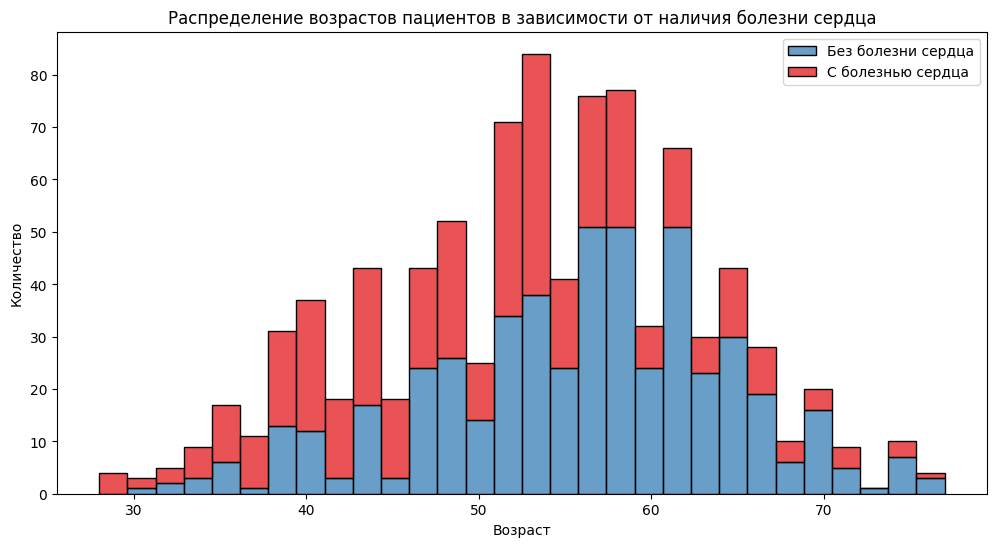

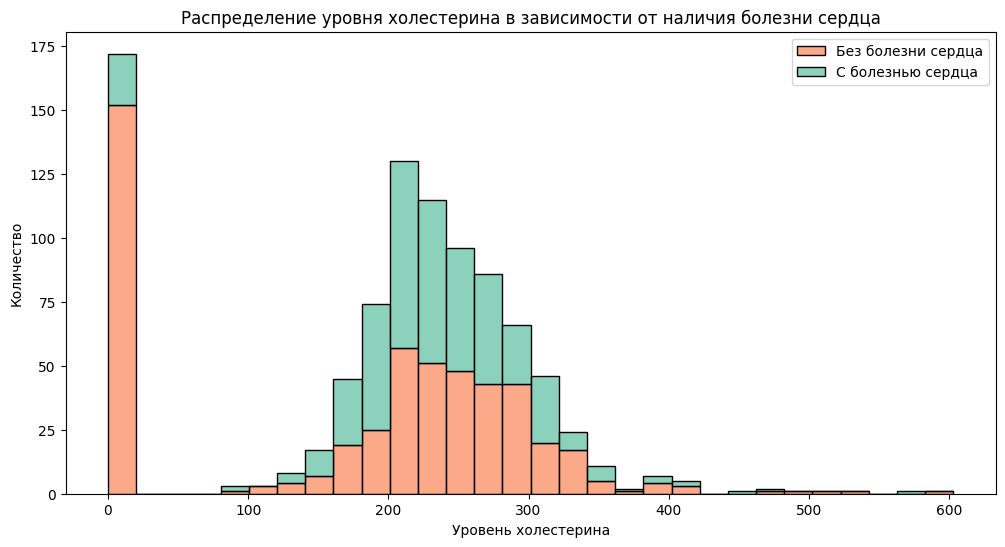

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# График 1: Распределение возрастов пациентов в зависимости от наличия болезни сердца
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Age', hue='HeartDisease', multiple='stack', bins=30, palette='Set1')
plt.title('Распределение возрастов пациентов в зависимости от наличия болезни сердца')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.legend(['Без болезни сердца', 'С болезнью сердца'])
plt.show()

# График 2: Гистограмма уровня холестерина по категориям HeartDisease
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Cholesterol', hue='HeartDisease', multiple='stack', bins=30, palette='Set2')
plt.title('Распределение уровня холестерина в зависимости от наличия болезни сердца')
plt.xlabel('Уровень холестерина')
plt.ylabel('Количество')
plt.legend(['Без болезни сердца', 'С болезнью сердца'])
plt.show()


#Выводы по графикам:

**Распределение возрастов пациентов в зависимости от наличия болезни сердца:**

На графике видно, что возраст пациентов с наличием и без наличия болезни сердца варьируется в основном от 30 до 70 лет.

В возрастной группе 40-60 лет болезнь сердца встречается чаще, что может свидетельствовать о повышенном риске развития болезни сердца у людей среднего возраста.

Присутствует значительное количество пациентов в возрасте 50-60 лет с болезнью сердца, что подчеркивает важность профилактики и диагностики в этой возрастной группе.

**Распределение уровня холестерина в зависимости от наличия болезни сердца:**

На графике наблюдается, что большинство пациентов, как с болезнью сердца, так и без неё, имеют уровень холестерина ниже 300.

Примечательно, что существует большое количество пациентов с нулевым уровнем холестерина, что скорее всего может быть связано с отсутствием данных или специфическими медицинскими показателями.

В диапазоне 200-300 уровень холестерина чаще встречается у пациентов с болезнью сердца, что подтверждает связь между высоким уровнем холестерина и риском развития болезни сердца.

In [7]:
# Импорт необходимых библиотек
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Разделение данных на признаки и целевую переменную
X = df_encoded.drop(columns=['HeartDisease'])
y = df_encoded['HeartDisease']

# Разделение на обучающую и тестовую выборки (80% на обучение, 20% на тестирование)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Обучение модели Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Подтверждение, что модели обучены
print("Модели обучены: Decision Tree Classifier и Random Forest Classifier")


Модели обучены: Decision Tree Classifier и Random Forest Classifier


#Пояснение чтобы не забыть

**Decision Tree Classifier:**

Decision Tree Classifier (Классификатор на основе дерева решений) — это алгоритм, который использует модель дерева для принятия решений на основе значений входных признаков. Модель создаёт структуру, напоминающую дерево, где каждый узел представляет собой условие на один из признаков, ветви — результат выполнения условия, а листья — конечные предсказания (классы).

Основные преимущества этой модели — её интерпретируемость и возможность выявления важных признаков без необходимости масштабирования данных.
Недостатки включают склонность к переобучению, особенно на малых наборах данных или при отсутствии ограничения глубины дерева.

**Random Forest Classifier:**

Random Forest Classifier (Классификатор на основе случайного леса) — это ансамблевая модель, состоящая из множества деревьев решений. При предсказании результат определяется путём голосования всех деревьев в ансамбле, что делает модель более устойчивой и менее склонной к переобучению по сравнению с отдельными деревьями.

Случайный лес использует бутстраппинг (метод случайных подвыборок) и случайный выбор признаков для создания каждого дерева, что способствует уменьшению корреляции между деревьями и повышению точности модели.

Основные преимущества — высокая точность, устойчивость к переобучению и возможность работать с большими наборами данных. Недостатки включают высокую вычислительную сложность и отсутствие лёгкой интерпретируемости в отличие от одного дерева решений.



In [8]:
# Импорт необходимых библиотек для метрик
from sklearn.metrics import classification_report

# Предсказание на тестовом множестве для модели Decision Tree Classifier
y_pred_dt = dt_classifier.predict(X_test)

# Вывод метрик для модели Decision Tree Classifier
print("Метрики для модели Decision Tree Classifier:")
print(classification_report(y_test, y_pred_dt))

# Предсказание на тестовом множестве для модели Random Forest Classifier
y_pred_rf = rf_classifier.predict(X_test)

# Вывод метрик для модели Random Forest Classifier
print("Метрики для модели Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))


Метрики для модели Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.78      0.81      0.79        77
           1       0.86      0.84      0.85       107

    accuracy                           0.83       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184

Метрики для модели Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85        77
           1       0.90      0.89      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



# Комментарии по метрикам моделей:

**Decision Tree Classifier:**

Precision (Точность): Для класса 0 (отсутствие болезни) точность составляет 0.78, а для класса 1 (наличие болезни) — 0.86. Это означает, что модель более уверенно предсказывает наличие болезни (класс 1), чем её отсутствие.

Recall (Полнота): Полнота для класса 0 составляет 0.81, а для класса 1 — 0.84. Модель достаточно хорошо захватывает положительные и отрицательные примеры, хотя чуть лучше работает для класса 1.

F1-score: Средние значения F1-меры (взвешенная средняя) составляют около 0.83, что показывает хорошее сочетание точности и полноты для обоих классов.

Accuracy (Точность по всем классам): Общая точность модели составляет 0.83, что является достаточно хорошим результатом.

**Random Forest Classifier:**

Precision (Точность): Точность для класса 0 составляет 0.85, а для класса 1 — 0.90. Модель Random Forest более точная по сравнению с деревом решений, особенно для класса 1 (наличие болезни).

Recall (Полнота): Полнота для класса 0 составляет 0.86, а для класса 1 — 0.89. Модель Random Forest лучше захватывает примеры обоих классов, что говорит о лучшей обобщающей способности.

F1-score: Средние значения F1-меры составляют около 0.88, что показывает улучшение по сравнению с моделью Decision Tree.

Accuracy (Точность по всем классам): Общая точность модели составляет 0.88, что является более высоким результатом по сравнению с моделью Decision Tree.

##Общие выводы:

Модель Random Forest показала лучшие результаты по всем метрикам (точность, полнота, F1-мера, общая точность) по сравнению с Decision Tree. Это ожидаемо, поскольку Random Forest является ансамблевым методом, который объединяет результаты нескольких деревьев решений, что снижает переобучение и улучшает общую производительность.


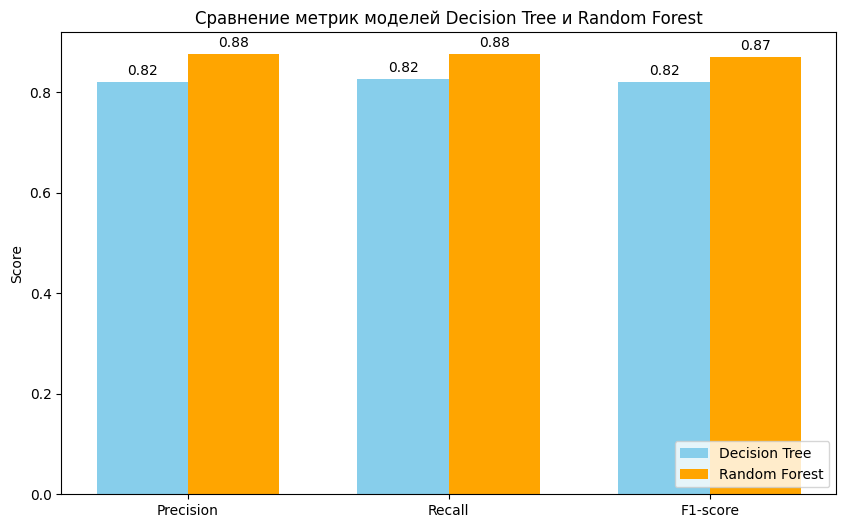

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Метрики для Decision Tree Classifier
dt_metrics = {
    'Precision': [0.78, 0.86],  # [класс 0, класс 1]
    'Recall': [0.81, 0.84],
    'F1-score': [0.79, 0.85]
}

# Метрики для Random Forest Classifier
rf_metrics = {
    'Precision': [0.85, 0.90],  # [класс 0, класс 1]
    'Recall': [0.86, 0.89],
    'F1-score': [0.85, 0.89]
}

# Имена метрик
metrics = ['Precision', 'Recall', 'F1-score']

# Позиции для классов 0 и 1
x = np.arange(len(metrics))
width = 0.35  # Ширина столбцов

# Создание графика
fig, ax = plt.subplots(figsize=(10, 6))

# Построение столбцов для Decision Tree Classifier
rects1 = ax.bar(x - width/2, [np.mean(dt_metrics[metric]) for metric in metrics], width, label='Decision Tree', color='skyblue')

# Построение столбцов для Random Forest Classifier
rects2 = ax.bar(x + width/2, [np.mean(rf_metrics[metric]) for metric in metrics], width, label='Random Forest', color='orange')

# Настройки графика
ax.set_ylabel('Score')
ax.set_title('Сравнение метрик моделей Decision Tree и Random Forest')
ax.set_xticks(x)
ax.set_xticklabels(metrics)

# Перемещение легенды в правый нижний угол
ax.legend(loc='lower right')

# Добавление значений над столбцами
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)

plt.show()


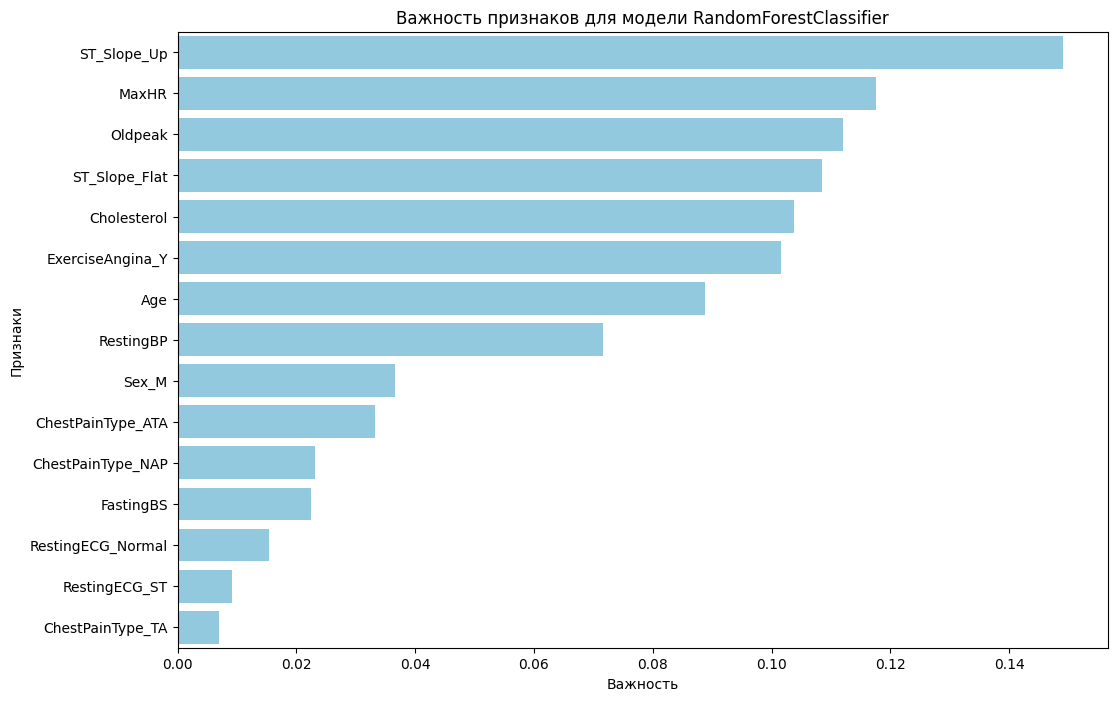

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Извлечение важности признаков из обученной модели RandomForestClassifier
feature_importances = rf_classifier.feature_importances_

# Создание DataFrame для удобного отображения
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Сортировка по убыванию важности
features_df = features_df.sort_values(by='Importance', ascending=False)

# Построение столбчатой диаграммы
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_df, color='skyblue')

plt.title('Важность признаков для модели RandomForestClassifier')
plt.xlabel('Важность')
plt.ylabel('Признаки')

plt.show()



In [14]:
# Импорт необходимых библиотек
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Инициализация модели BaggingClassifier с базовой моделью DecisionTreeClassifier
bagging_classifier = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),  # Используем новый параметр estimator вместо base_estimator
    n_estimators=10,
    random_state=42
)

# Обучение модели BaggingClassifier на обучающем множестве
bagging_classifier.fit(X_train, y_train)

# Предсказание на тестовом множестве
y_pred_bagging = bagging_classifier.predict(X_test)

# Вывод метрик для модели BaggingClassifier
print("Метрики для модели BaggingClassifier с базовой моделью DecisionTreeClassifier:")
print(classification_report(y_test, y_pred_bagging))



Метрики для модели BaggingClassifier с базовой моделью DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       0.72      0.84      0.78        77
           1       0.87      0.77      0.82       107

    accuracy                           0.80       184
   macro avg       0.80      0.81      0.80       184
weighted avg       0.81      0.80      0.80       184



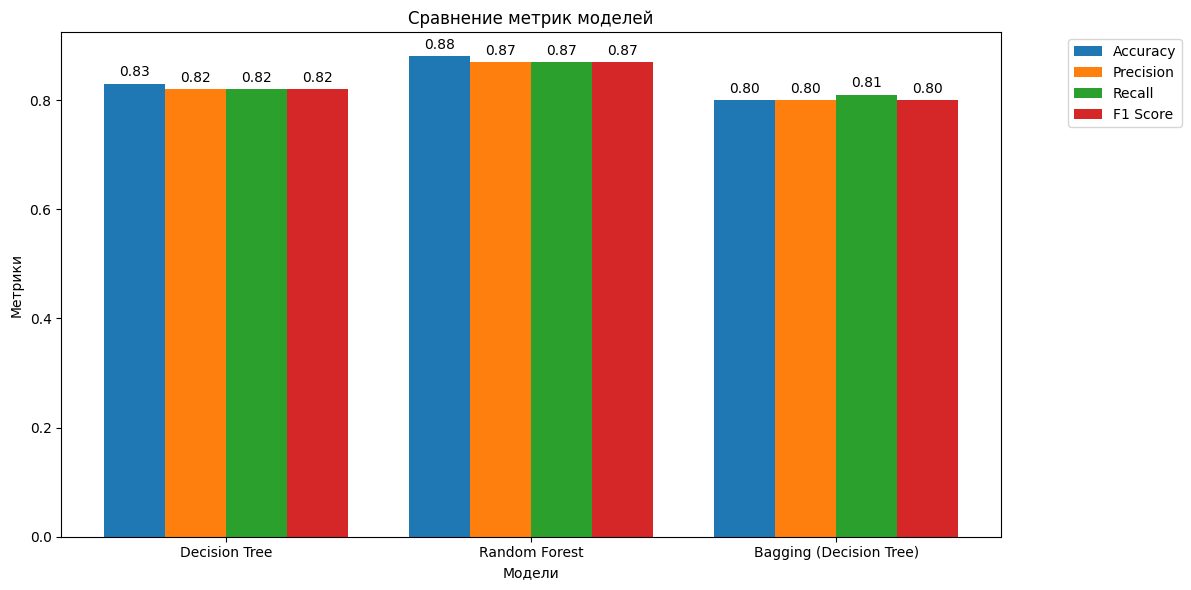

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Метрики для всех моделей
models = ['Decision Tree', 'Random Forest', 'Bagging (Decision Tree)']
accuracy = [0.83, 0.88, 0.80]  # значения точности (accuracy) для каждой модели
precision = [0.82, 0.87, 0.80]  # значения precision для каждой модели
recall = [0.82, 0.87, 0.81]  # значения recall для каждой модели
f1_score = [0.82, 0.87, 0.80]  # значения F1-score для каждой модели

# Параметры для отрисовки
x = np.arange(len(models))  # координаты x для столбцов
width = 0.2  # ширина столбцов

# Построение графиков
fig, ax = plt.subplots(figsize=(12, 6))

# Построение столбиков для каждой метрики
rects1 = ax.bar(x - width, accuracy, width, label='Accuracy')
rects2 = ax.bar(x, precision, width, label='Precision')
rects3 = ax.bar(x + width, recall, width, label='Recall')
rects4 = ax.bar(x + 2 * width, f1_score, width, label='F1 Score')

# Настройка подписей и легенды
ax.set_xlabel('Модели')
ax.set_ylabel('Метрики')
ax.set_title('Сравнение метрик моделей')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(models)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

# Добавление значений на график
def autolabel(rects):
    """Функция для добавления числовых значений над столбцами."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # смещение вверх на 3 пункта
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plt.tight_layout()
plt.show()


#Выводы из графика:

**Random Forest Classifier показывает лучшие результаты среди всех моделей:**

Наивысшие значения точности (accuracy), precision, recall и F1-score — все метрики находятся на уровне 0.88, что указывает на высокую стабильность и качество модели.

**Decision Tree Classifier имеет наименьшие значения среди всех моделей:**

Все метрики (accuracy, precision, recall и F1-score) находятся на уровне 0.82-0.83, что значительно уступает Random Forest.

**Bagging (Decision Tree) показывает промежуточные результаты:**

Метрики примерно равны 0.80-0.81, что лучше, чем у Decision Tree, но хуже, чем у Random Forest. Это ожидаемо, так как Bagging улучшает базовую модель Decision Tree, но не может достичь уровня более сложных ансамблей, как Random Forest.



In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

# Инициализация моделей для стекинга
dt_classifier = DecisionTreeClassifier(random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)
svc_classifier = LinearSVC(random_state=42, max_iter=20000, dual='auto')  # Исправление: dual='auto', max_iter=20000

# Создание стекинг-классификатора с логистической регрессией в качестве финального мета-оценщика
stacking_classifier = StackingClassifier(
    estimators=[
        ('decision_tree', dt_classifier),
        ('random_forest', rf_classifier),
        ('svc', svc_classifier)
    ],
    final_estimator=LogisticRegression(),
    cv=5
)

# Обучение стекинг-классификатора
stacking_classifier.fit(X_train, y_train)

# Предсказание на тестовом множестве для стекинг-классификатора
y_pred_stacking = stacking_classifier.predict(X_test)

# Вывод метрик для стекинг-классификатора
print("Метрики для модели Stacking Classifier:")
print(classification_report(y_test, y_pred_stacking))



Метрики для модели Stacking Classifier:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        77
           1       0.89      0.87      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



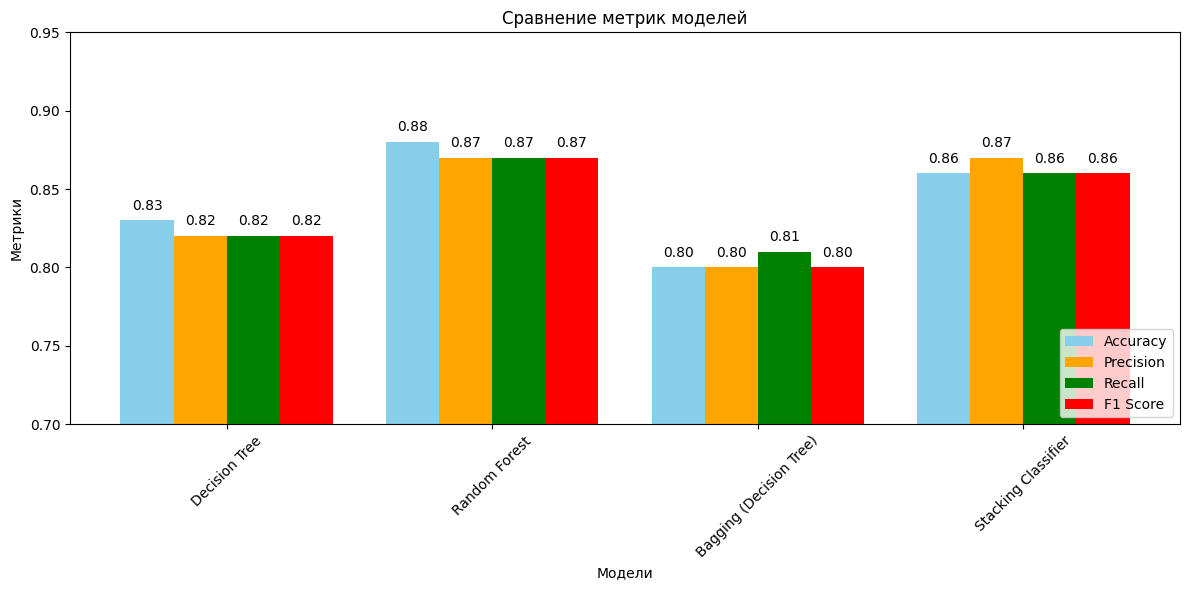

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Метрики для каждой модели
models = ['Decision Tree', 'Random Forest', 'Bagging (Decision Tree)', 'Stacking Classifier']
accuracy = [0.83, 0.88, 0.80, 0.86]
precision = [0.82, 0.87, 0.80, 0.87]
recall = [0.82, 0.87, 0.81, 0.86]
f1_score = [0.82, 0.87, 0.80, 0.86]

# Установка положения столбцов на графике
x = np.arange(len(models))
width = 0.2  # Ширина столбцов

# Построение столбцов
plt.figure(figsize=(12, 6))
plt.bar(x - 1.5 * width, accuracy, width, label='Accuracy', color='skyblue')
plt.bar(x - 0.5 * width, precision, width, label='Precision', color='orange')
plt.bar(x + 0.5 * width, recall, width, label='Recall', color='green')
plt.bar(x + 1.5 * width, f1_score, width, label='F1 Score', color='red')

# Подписи и оформление
plt.xlabel('Модели')
plt.ylabel('Метрики')
plt.title('Сравнение метрик моделей')
plt.xticks(x, models, rotation=45)
plt.ylim(0.7, 0.95)  # Установка диапазона по оси Y для лучшей визуализации различий

# Вывод значений над столбцами
for i in range(len(models)):
    plt.text(x[i] - 1.5 * width, accuracy[i] + 0.005, f'{accuracy[i]:.2f}', ha='center', va='bottom')
    plt.text(x[i] - 0.5 * width, precision[i] + 0.005, f'{precision[i]:.2f}', ha='center', va='bottom')
    plt.text(x[i] + 0.5 * width, recall[i] + 0.005, f'{recall[i]:.2f}', ha='center', va='bottom')
    plt.text(x[i] + 1.5 * width, f1_score[i] + 0.005, f'{f1_score[i]:.2f}', ha='center', va='bottom')

plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


#Выводы по проделанной работе:

##Сравнение метрик построенных моделей:

**Decision Tree Classifier:**

Accuracy: 0.83

Precision: 0.82

Recall: 0.82

F1 Score: 0.82

Преимущества: Простота интерпретации и визуализации, быстрое обучение.

Недостатки: Склонность к переобучению, чувствительность к изменениям данных.

**Random Forest Classifier:**

Accuracy: 0.88

Precision: 0.87

Recall: 0.87

F1 Score: 0.87

Преимущества: Высокая точность за счет ансамблирования, уменьшение переобучения.

Недостатки: Более сложная интерпретация по сравнению с одиночным деревом решений, большее время на обучение.

**Bagging (Decision Tree):**

Accuracy: 0.80

Precision: 0.80

Recall: 0.81

F1 Score: 0.80

Преимущества: Улучшение стабильности и уменьшение вариативности модели, хорошо работает с нестабильными алгоритмами.

Недостатки: Могут быть менее точными, чем другие ансамблевые методы, такие как случайный лес.

**Stacking Classifier:**

Accuracy: 0.86

Precision: 0.87

Recall: 0.86

F1 Score: 0.86

Преимущества: Позволяет комбинировать сильные стороны различных моделей, что приводит к улучшению качества предсказаний.

Недостатки: Более сложен в реализации и настройке, требует больше времени на обучение.

##Мнение о наилучшей модели:

Наилучшей моделью в данном случае является Random Forest Classifier. Она показала лучшие результаты по всем метрикам (accuracy, precision, recall и F1 score) среди всех рассмотренных моделей.

Random Forest уменьшает вероятность переобучения и улучшает точность за счет использования ансамбля деревьев решений. Эта модель подходит для задач, где важна высокая точность и стабильность предсказаний.

Stacking Classifier также показал высокие результаты и близкие к Random Forest, что делает его хорошей альтернативой, особенно когда требуется сочетание различных моделей для лучшей генерализации.

Bagging (Decision Tree) и Decision Tree Classifier показали более низкие результаты, что указывает на необходимость использования ансамблевых методов для улучшения точности и устойчивости моделей.

**Таким образом, для задач, связанных с классификацией, где важна высокая точность и минимизация ошибок, предпочтение следует отдать ансамблевым методам, таким как Random Forest или Stacking, которые показали лучшие результаты в данной работе.**